In [1]:
import pandas as pd
from IPython.display import display

city = "Madrid"
# Load restaurants
#items = pd.read_pickle(f"{city}/items.pkl")
# Load users
#users = pd.read_pickle(f"{city}/users.pkl")
# Load reviews
reviews = pd.read_pickle(f"{city}/reviews.pkl")

In [2]:
#display(items.head())
#display(users.head())
display(reviews.head())
display(reviews.info())

,reviewId,userId,itemId,title,text,date,rating,language,images,url
0,881374404,74B2D6F62DB1CEC358822079728F8317,20112202,Cena en familia,"Pedimos una pizza para cenar, mitad barbacoa m...",2023-03-07,50,es,[https://media-cdn.tripadvisor.com/media/photo...,https://www.tripadvisor.com/ShowUserReviews-g1...
1,872226520,1B3559478B9FF8A52A552BA99AC6F00E,20112202,Que asco de restaurante,"Better pizza, mejor ponte a hacer pan que tien...",2022-12-19,10,es,[],https://www.tripadvisor.com/ShowUserReviews-g1...
2,850451467,FE5E99DC6572BB56B2D1D893BC13A392,20112202,"Pizzas distintas, riquísimas","Pizza de rabo de toro, conejo al ajillo,... so...",2022-07-28,50,es,[https://media-cdn.tripadvisor.com/media/photo...,https://www.tripadvisor.com/ShowUserReviews-g1...
3,810574583,9E85C6C3DA1C0498B1EEEE9A3A833A99,20112202,ONE OF THE BEST PIZZAS,"pizza rica y distinta. calidad muy alta, el sa...",2021-09-18,50,es,[],https://www.tripadvisor.com/ShowUserReviews-g1...
4,757187287,5FB02D459F27ECD91CB38AC3CCD92B79,20112202,Muy buenas pizzas. Tienen,Muy buenas pizzas. Tienen de varios tamaños pe...,2020-06-10,50,es,[],https://www.tripadvisor.com/ShowUserReviews-g1...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1347959 entries, 0 to 1347958
Data columns (total 10 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   reviewId  1347959 non-null  int64 
 1   userId    1347959 non-null  object
 2   itemId    1347959 non-null  int64 
 3   title     1347959 non-null  object
 4   text      1347959 non-null  object
 5   date      1347959 non-null  object
 6   rating    1347959 non-null  int64 
 7   language  1347959 non-null  object
 8   images    1347959 non-null  object
 9   url       1347959 non-null  object
dtypes: int64(3), object(7)
memory usage: 102.8+ MB


None

In [3]:
#reviews = reviews[reviews["language"] == "es"]

In [4]:
# ==============================================================================
# COMPREHENSIVE DATA EXPLORATION - REVIEWS TEXT ANALYSIS
# ==============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
try:
    from wordcloud import WordCloud
    WORDCLOUD_AVAILABLE = True
except ImportError:
    WORDCLOUD_AVAILABLE = False
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("="*80)
print("COMPREHENSIVE REVIEWS DATA EXPLORATION")
print("="*80)

# 1. BASIC DATASET OVERVIEW
print("\n1. BASIC DATASET OVERVIEW")
print("-" * 50)
print(f"Dataset shape: {reviews.shape}")
print(f"Total reviews: {len(reviews):,}")
print(f"Memory usage: {reviews.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Basic info about all columns
print("\nColumn Information:")
for col in reviews.columns:
    null_count = reviews[col].isnull().sum()
    null_pct = (null_count / len(reviews)) * 100
    
    # Handle columns that might contain unhashable types (like lists)
    try:
        unique_count = reviews[col].nunique()
    except TypeError:
        # For columns with lists, count unique string representations
        unique_count = reviews[col].astype(str).nunique()
        
    print(f"  {col:12} | Nulls: {null_count:7,} ({null_pct:5.2f}%) | Unique: {unique_count:8,}")

# Date range
reviews['date_parsed'] = pd.to_datetime(reviews['date'])
print(f"\nDate range: {reviews['date_parsed'].min()} to {reviews['date_parsed'].max()}")
print(f"Time span: {(reviews['date_parsed'].max() - reviews['date_parsed'].min()).days} days")

COMPREHENSIVE REVIEWS DATA EXPLORATION

1. BASIC DATASET OVERVIEW
--------------------------------------------------
Dataset shape: (1347959, 10)
Total reviews: 1,347,959
Memory usage: 1299.43 MB

Column Information:
  reviewId     | Nulls:       0 ( 0.00%) | Unique: 1,339,351
  userId       | Nulls:       0 ( 0.00%) | Unique:  629,201
  itemId       | Nulls:       0 ( 0.00%) | Unique:   10,109
  title        | Nulls:       0 ( 0.00%) | Unique:  799,215
  text         | Nulls:       0 ( 0.00%) | Unique: 1,338,757
  date         | Nulls:       0 ( 0.00%) | Unique:    5,562
  rating       | Nulls:       0 ( 0.00%) | Unique:        5
  language     | Nulls:       0 ( 0.00%) | Unique:       27
  images       | Nulls:       0 ( 0.00%) | Unique:  256,655
  url          | Nulls:       0 ( 0.00%) | Unique: 1,339,351

Date range: 2002-11-11 00:00:00 to 2023-06-10 00:00:00
Time span: 7516 days


In [5]:
# 2. TEXT COLUMN DETAILED ANALYSIS
print("\n2. TEXT COLUMN DETAILED ANALYSIS")
print("-" * 50)

# Text length statistics
reviews['text_length'] = reviews['text'].str.len()
reviews['word_count'] = reviews['text'].str.split().str.len()

print(f"Text length statistics (characters):")
print(f"  Mean: {reviews['text_length'].mean():.1f}")
print(f"  Median: {reviews['text_length'].median():.1f}")
print(f"  Std: {reviews['text_length'].std():.1f}")
print(f"  Min: {reviews['text_length'].min()}")
print(f"  Max: {reviews['text_length'].max()}")
print(f"  25%: {reviews['text_length'].quantile(0.25):.1f}")
print(f"  75%: {reviews['text_length'].quantile(0.75):.1f}")

print(f"\nWord count statistics:")
print(f"  Mean: {reviews['word_count'].mean():.1f}")
print(f"  Median: {reviews['word_count'].median():.1f}")
print(f"  Std: {reviews['word_count'].std():.1f}")
print(f"  Min: {reviews['word_count'].min()}")
print(f"  Max: {reviews['word_count'].max()}")

# Text length categories
reviews['text_category'] = pd.cut(reviews['text_length'], 
                                bins=[0, 50, 150, 300, 500, float('inf')],
                                labels=['Very Short (≤50)', 'Short (51-150)', 
                                       'Medium (151-300)', 'Long (301-500)', 
                                       'Very Long (>500)'])

print(f"\nText length distribution by category:")
print(reviews['text_category'].value_counts().sort_index())
print(f"\nPercentage distribution:")
print((reviews['text_category'].value_counts(normalize=True).sort_index() * 100).round(2))


2. TEXT COLUMN DETAILED ANALYSIS
--------------------------------------------------
Text length statistics (characters):
  Mean: 346.5
  Median: 257.0
  Std: 300.8
  Min: 3
  Max: 15874
  25%: 163.0
  75%: 421.0

Word count statistics:
  Mean: 60.1
  Median: 44.0
  Std: 53.7
  Min: 1
  Max: 2538

Text length distribution by category:
text_category
Very Short (≤50)       951
Short (51-150)      278831
Medium (151-300)    510636
Long (301-500)      312370
Very Long (>500)    245171
Name: count, dtype: int64

Percentage distribution:
text_category
Very Short (≤50)     0.07
Short (51-150)      20.69
Medium (151-300)    37.88
Long (301-500)      23.17
Very Long (>500)    18.19
Name: proportion, dtype: float64


In [6]:
# 3. LANGUAGE DISTRIBUTION ANALYSIS
print("\n3. LANGUAGE DISTRIBUTION ANALYSIS")
print("-" * 50)

lang_counts = reviews['language'].value_counts()
print("Language distribution:")
for lang, count in lang_counts.head(10).items():
    pct = (count / len(reviews)) * 100
    print(f"  {lang}: {count:,} ({pct:.2f}%)")

# Text length by language
print(f"\nAverage text length by language:")
lang_text_stats = reviews.groupby('language').agg({
    'text_length': ['mean', 'median', 'std'],
    'word_count': ['mean', 'median']
}).round(1)

for lang in lang_counts.head(5).index:
    stats = reviews[reviews['language'] == lang]
    print(f"  {lang}: {stats['text_length'].mean():.1f} chars, {stats['word_count'].mean():.1f} words")

# 4. RATING DISTRIBUTION ANALYSIS
print("\n4. RATING DISTRIBUTION ANALYSIS")
print("-" * 50)

rating_counts = reviews['rating'].value_counts().sort_index()
print("Rating distribution:")
for rating, count in rating_counts.items():
    pct = (count / len(reviews)) * 100
    print(f"  {rating}: {count:,} ({pct:.2f}%)")

print(f"\nAverage text length by rating:")
for rating in sorted(reviews['rating'].unique()):
    subset = reviews[reviews['rating'] == rating]
    print(f"  Rating {rating}: {subset['text_length'].mean():.1f} chars, {subset['word_count'].mean():.1f} words")


3. LANGUAGE DISTRIBUTION ANALYSIS
--------------------------------------------------
Language distribution:
  es: 964,056 (71.52%)
  en: 200,628 (14.88%)
  it: 71,858 (5.33%)
  fr: 39,690 (2.94%)
  pt: 30,588 (2.27%)
  de: 9,497 (0.70%)
  nl: 8,329 (0.62%)
  ru: 7,593 (0.56%)
  ja: 2,850 (0.21%)
  zh: 2,398 (0.18%)

Average text length by language:
  es: 350.9 chars, 61.0 words
  en: 366.6 chars, 66.6 words
  it: 345.3 chars, 55.9 words
  fr: 288.0 chars, 49.3 words
  pt: 246.8 chars, 41.3 words

4. RATING DISTRIBUTION ANALYSIS
--------------------------------------------------
Rating distribution:
  10: 105,657 (7.84%)
  20: 72,346 (5.37%)
  30: 153,771 (11.41%)
  40: 372,085 (27.60%)
  50: 644,100 (47.78%)

Average text length by rating:
  Rating 10: 496.2 chars, 89.1 words
  Rating 20: 491.9 chars, 87.6 words
  Rating 30: 399.0 chars, 70.4 words
  Rating 40: 335.9 chars, 58.1 words
  Rating 50: 299.1 chars, 51.1 words


In [7]:
# 5. TEXT CONTENT ANALYSIS
print("\n5. TEXT CONTENT ANALYSIS - SPANISH REVIEWS")
print("-" * 50)

# Focus on Spanish reviews for text analysis
spanish_reviews = reviews[reviews['language'] == 'es'].copy()
print(f"Spanish reviews: {len(spanish_reviews):,} ({len(spanish_reviews)/len(reviews)*100:.1f}%)")

# Basic text cleaning for analysis
def clean_text_for_analysis(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs, mentions, hashtags
    text = re.sub(r'http\S+|www\S+|@\w+|#\w+', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

spanish_reviews['text_clean'] = spanish_reviews['text'].apply(clean_text_for_analysis)

# Word frequency analysis
all_words = ' '.join(spanish_reviews['text_clean']).split()
word_freq = Counter(all_words)

# Common Spanish stop words
spanish_stopwords = {'el', 'la', 'de', 'que', 'y', 'a', 'en', 'un', 'es', 'se', 'no', 'te', 'lo', 'le', 'da', 'su', 'por', 'son', 'con', 'para', 'al', 'del', 'los', 'las', 'pero', 'su', 'me', 'si', 'muy', 'más', 'una', 'este', 'esta', 'le', 'han', 'todo', 'nos', 'yo', 'mi', 'tiene', 'bien', 'hace', 'desde', 'cada', 'hasta', 'sin', 'sobre', 'hacer', 'tanto', 'esta', 'estos', 'esta', 'como', 'fue', 'ser', 'nos', 'o', 'era', 'estar'}

# Filter out stop words and short words
filtered_words = [word for word in all_words if len(word) > 2 and word not in spanish_stopwords]
filtered_word_freq = Counter(filtered_words)

print(f"\nTop 20 most common words (excluding stop words):")
for word, freq in filtered_word_freq.most_common(20):
    print(f"  {word}: {freq:,}")

print(f"\nTotal unique words: {len(word_freq):,}")
print(f"Total words after filtering: {len(filtered_word_freq):,}")
print(f"Average words per review: {len(all_words)/len(spanish_reviews):.1f}")


5. TEXT CONTENT ANALYSIS - SPANISH REVIEWS
--------------------------------------------------
Spanish reviews: 964,056 (71.5%)

Top 20 most common words (excluding stop words):
  comida: 355,831
  servicio: 207,238
  buena: 193,969
  sitio: 178,531
  restaurante: 168,517
  platos: 159,632
  calidad: 159,258
  precio: 156,159
  buen: 154,989
  estaba: 138,020
  está: 134,166
  local: 121,229
  poco: 115,635
  atención: 115,140
  hay: 113,654
  trato: 111,234
  comer: 108,282
  lugar: 106,390
  pedimos: 101,842
  mejor: 101,679

Total unique words: 819,909
Total words after filtering: 817,732
Average words per review: 61.0


In [8]:
# 6. SENTIMENT ANALYSIS BY RATING
print("\n6. SENTIMENT ANALYSIS BY RATING")
print("-" * 50)

# Analyze positive/negative words by rating
positive_words = ['bueno', 'buena', 'excelente', 'genial', 'perfecto', 'rico', 'delicioso', 'increíble', 'fantástico', 'recomiendo', 'encantador', 'maravilloso', 'espectacular', 'fenomenal']
negative_words = ['malo', 'mala', 'horrible', 'terrible', 'pésimo', 'asqueroso', 'desastroso', 'decepcionante', 'lamentable', 'deplorable', 'fatal', 'espantoso']

def count_sentiment_words(text, word_list):
    text_lower = text.lower()
    return sum(1 for word in word_list if word in text_lower)

spanish_reviews['positive_words'] = spanish_reviews['text'].apply(lambda x: count_sentiment_words(x, positive_words))
spanish_reviews['negative_words'] = spanish_reviews['text'].apply(lambda x: count_sentiment_words(x, negative_words))
spanish_reviews['sentiment_score'] = spanish_reviews['positive_words'] - spanish_reviews['negative_words']

print("Average sentiment indicators by rating:")
sentiment_by_rating = spanish_reviews.groupby('rating').agg({
    'positive_words': 'mean',
    'negative_words': 'mean', 
    'sentiment_score': 'mean',
    'text_length': 'mean'
}).round(2)

for rating in sorted(spanish_reviews['rating'].unique()):
    stats = sentiment_by_rating.loc[rating]
    print(f"  Rating {rating}: +{stats['positive_words']:.2f} pos, -{stats['negative_words']:.2f} neg, score: {stats['sentiment_score']:.2f}, {stats['text_length']:.0f} chars")

# 7. TEXT PATTERNS AND SPECIAL CHARACTERS
print("\n7. TEXT PATTERNS AND SPECIAL CHARACTERS")  
print("-" * 50)

# Check for special patterns
patterns = {
    'emails': r'\S+@\S+',
    'phone_numbers': r'\d{3,}[-\s]?\d{3,}[-\s]?\d{3,}',
    'urls': r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',
    'mentions': r'@\w+',
    'exclamations': r'!+',
    'questions': r'\?+',
    'numbers': r'\d+',
    'capital_words': r'\b[A-Z]{2,}\b'
}

print("Pattern frequency in Spanish reviews:")
for pattern_name, pattern in patterns.items():
    matches = spanish_reviews['text'].str.count(pattern, flags=re.IGNORECASE)
    total_matches = matches.sum()
    reviews_with_pattern = (matches > 0).sum()
    print(f"  {pattern_name}: {total_matches:,} total, in {reviews_with_pattern:,} reviews ({reviews_with_pattern/len(spanish_reviews)*100:.1f}%)")

# Check average length by rating
print(f"\nReviews with multiple exclamation marks by rating:")
spanish_reviews['multiple_exclamations'] = spanish_reviews['text'].str.count(r'!{2,}') > 0
exclamation_by_rating = spanish_reviews.groupby('rating')['multiple_exclamations'].mean() * 100
for rating in sorted(spanish_reviews['rating'].unique()):
    print(f"  Rating {rating}: {exclamation_by_rating[rating]:.1f}%")


6. SENTIMENT ANALYSIS BY RATING
--------------------------------------------------
Average sentiment indicators by rating:
  Rating 10: +0.34 pos, -0.46 neg, score: -0.12, 501 chars
  Rating 20: +0.52 pos, -0.30 neg, score: 0.23, 506 chars
  Rating 30: +0.76 pos, -0.11 neg, score: 0.65, 409 chars
  Rating 40: +1.06 pos, -0.03 neg, score: 1.03, 341 chars
  Rating 50: +1.12 pos, -0.01 neg, score: 1.10, 293 chars

7. TEXT PATTERNS AND SPECIAL CHARACTERS
--------------------------------------------------
Pattern frequency in Spanish reviews:
  emails: 2,670 total, in 2,079 reviews (0.2%)
  phone_numbers: 141 total, in 135 reviews (0.0%)
  urls: 147 total, in 141 reviews (0.0%)
  mentions: 4,219 total, in 3,200 reviews (0.3%)
  exclamations: 293,263 total, in 185,531 reviews (19.2%)
  questions: 26,346 total, in 20,485 reviews (2.1%)
  numbers: 619,311 total, in 281,662 reviews (29.2%)
  capital_words: 50,330,135 total, in 964,052 reviews (100.0%)

Reviews with multiple exclamation marks b

In [9]:
# 8. DATA QUALITY AND MISSING VALUES
print("\n8. DATA QUALITY AND MISSING VALUES")
print("-" * 50)

# Check for potential data quality issues
print("Text quality analysis:")

# Empty or very short texts
empty_texts = (reviews['text'].str.len() <= 3).sum()
very_short = (reviews['text'].str.len() <= 10).sum()
print(f"  Empty/minimal texts (≤3 chars): {empty_texts:,} ({empty_texts/len(reviews)*100:.2f}%)")
print(f"  Very short texts (≤10 chars): {very_short:,} ({very_short/len(reviews)*100:.2f}%)")

# Duplicate texts
duplicate_texts = reviews['text'].duplicated().sum()
print(f"  Duplicate texts: {duplicate_texts:,} ({duplicate_texts/len(reviews)*100:.2f}%)")

# Check for suspicious patterns
suspicious_patterns = {
    'only_punctuation': r'^[^\w\s]*$',
    'only_numbers': r'^\d+$',
    'repeated_chars': r'(.)\1{10,}',  # 10+ repeated characters
    'mostly_caps': lambda x: len(re.findall(r'[A-Z]', x)) > len(x) * 0.7 if len(x) > 10 else False
}

print(f"\nSuspicious text patterns:")
for pattern_name, pattern in suspicious_patterns.items():
    if pattern_name == 'mostly_caps':
        suspicious_count = spanish_reviews['text'].apply(pattern).sum()
    else:
        suspicious_count = spanish_reviews['text'].str.contains(pattern, regex=True).sum()
    print(f"  {pattern_name}: {suspicious_count:,} ({suspicious_count/len(spanish_reviews)*100:.2f}%)")

# 9. SAMPLE TEXTS BY RATING AND LENGTH
print("\n9. SAMPLE TEXTS BY RATING AND LENGTH")
print("-" * 50)

print("Sample short positive review (rating 50):")
short_positive = spanish_reviews[(spanish_reviews['rating'] == 50) & (spanish_reviews['text_length'] < 100)]['text'].iloc[0] if len(spanish_reviews[(spanish_reviews['rating'] == 50) & (spanish_reviews['text_length'] < 100)]) > 0 else "No samples found"
print(f"  '{short_positive}'")

print(f"\nSample long positive review (rating 50):")
long_positive = spanish_reviews[(spanish_reviews['rating'] == 50) & (spanish_reviews['text_length'] > 300)]['text'].iloc[0] if len(spanish_reviews[(spanish_reviews['rating'] == 50) & (spanish_reviews['text_length'] > 300)]) > 0 else "No samples found"
print(f"  '{long_positive[:200]}...'")

print(f"\nSample negative review (rating 10):")
negative = spanish_reviews[spanish_reviews['rating'] == 10]['text'].iloc[0] if len(spanish_reviews[spanish_reviews['rating'] == 10]) > 0 else "No samples found"
print(f"  '{negative}'")

print("\n" + "="*80)
print("EXPLORATION COMPLETE")
print("="*80)


8. DATA QUALITY AND MISSING VALUES
--------------------------------------------------
Text quality analysis:
  Empty/minimal texts (≤3 chars): 2 (0.00%)
  Very short texts (≤10 chars): 57 (0.00%)
  Duplicate texts: 9,202 (0.68%)

Suspicious text patterns:
  only_punctuation: 0 (0.00%)
  only_numbers: 0 (0.00%)
  repeated_chars: 1,073 (0.11%)
  mostly_caps: 45 (0.00%)

9. SAMPLE TEXTS BY RATING AND LENGTH
--------------------------------------------------
Sample short positive review (rating 50):
  'Hoy fuimos al rastro y pasamos por este sitio para desayunar algo. La comida está muy rica ‍♀️'

Sample long positive review (rating 50):
  'Fui a celebrar mi cumpleaños allí con mis amigas y nos encanto, de hecho hemos repetido y usado su servicio de recogida para llevar en el restaurante. La masa de la pizza es muy original y está riquís...'

Sample negative review (rating 10):
  'Better pizza, mejor ponte a hacer pan que tienen los mismos ingredientes que hechais a las pizzas, osea solo 


10. CREATING VISUALIZATIONS
--------------------------------------------------


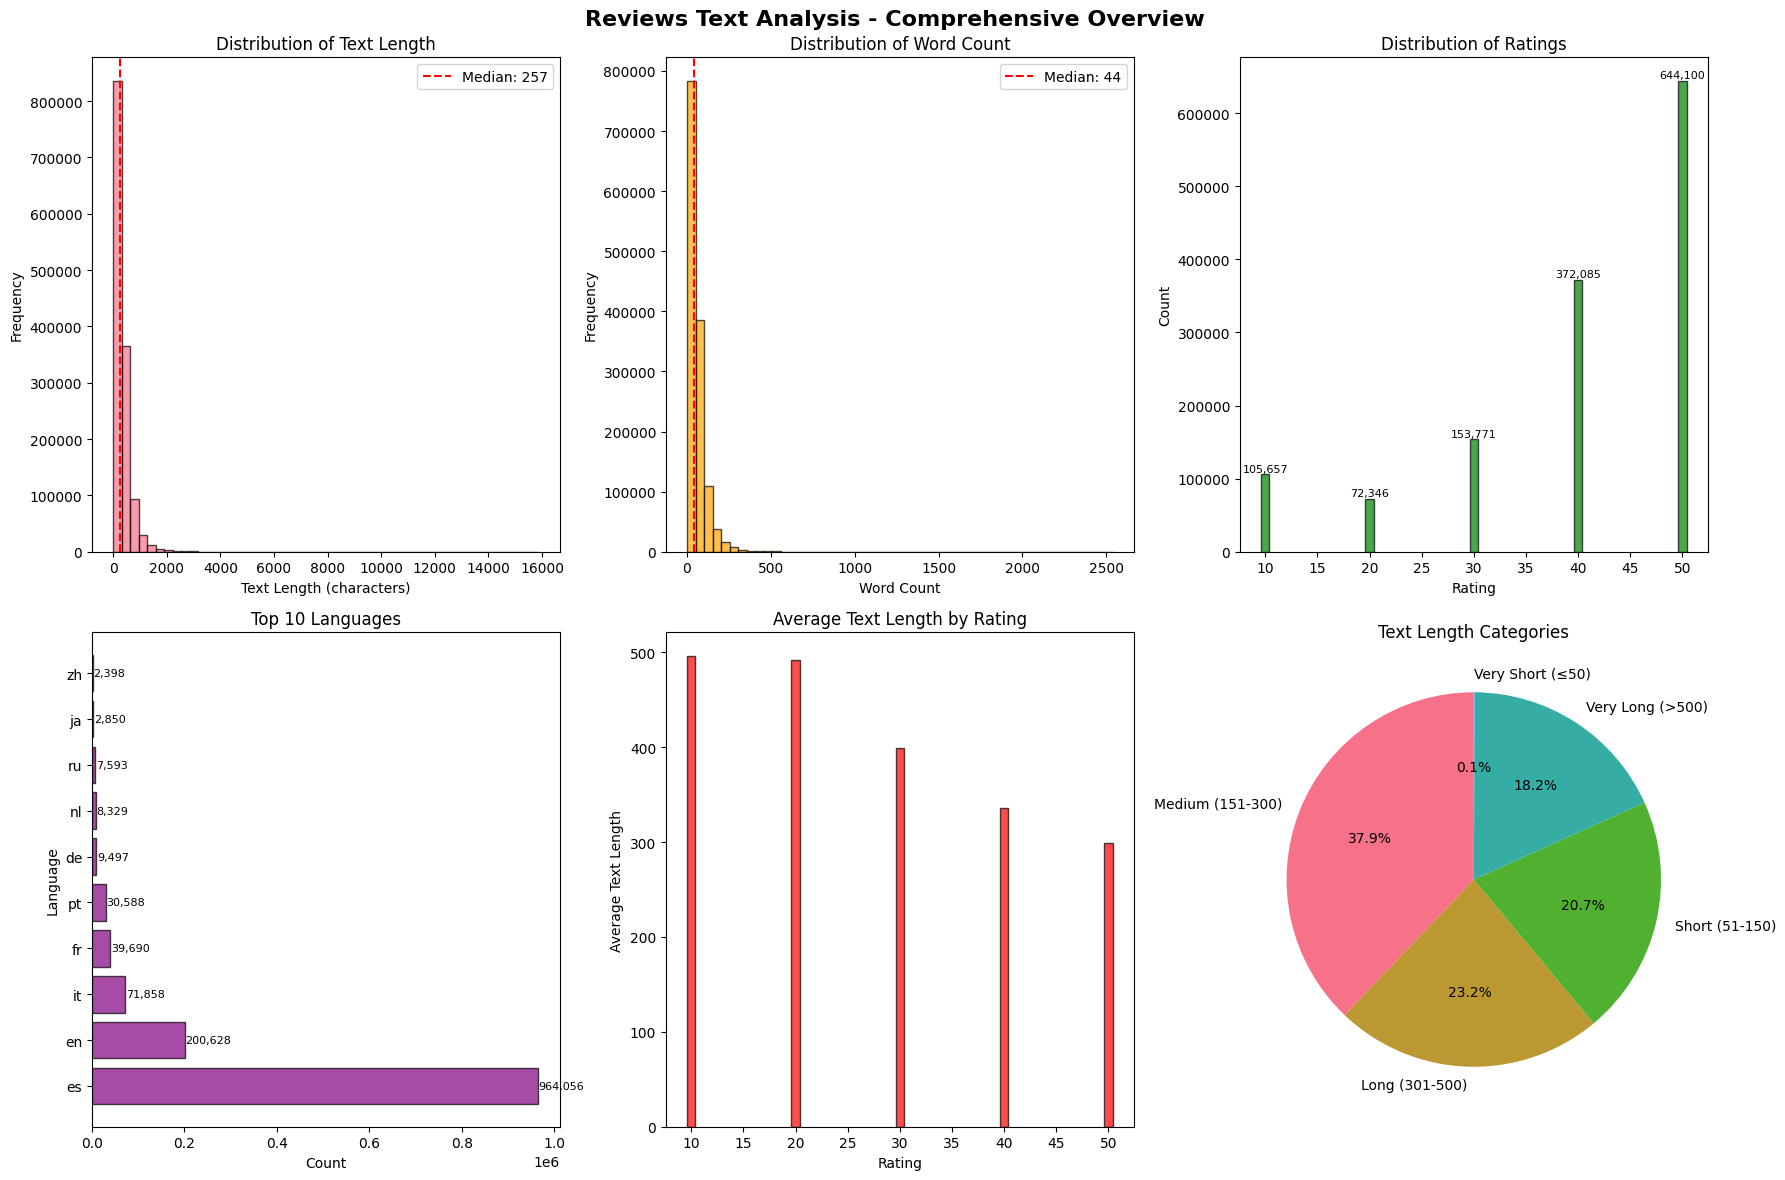

Visualizations created successfully!


In [10]:
# 10. VISUALIZATIONS
print("\n10. CREATING VISUALIZATIONS")
print("-" * 50)

# Create visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Reviews Text Analysis - Comprehensive Overview', fontsize=16, fontweight='bold')

# 1. Text length distribution
axes[0, 0].hist(reviews['text_length'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Text Length (characters)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Text Length')
axes[0, 0].axvline(reviews['text_length'].median(), color='red', linestyle='--', label=f'Median: {reviews["text_length"].median():.0f}')
axes[0, 0].legend()

# 2. Word count distribution
axes[0, 1].hist(reviews['word_count'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_xlabel('Word Count')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Word Count')
axes[0, 1].axvline(reviews['word_count'].median(), color='red', linestyle='--', label=f'Median: {reviews["word_count"].median():.0f}')
axes[0, 1].legend()

# 3. Rating distribution
rating_counts = reviews['rating'].value_counts().sort_index()
axes[0, 2].bar(rating_counts.index, rating_counts.values, edgecolor='black', alpha=0.7, color='green')
axes[0, 2].set_xlabel('Rating')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_title('Distribution of Ratings')
for i, v in enumerate(rating_counts.values):
    axes[0, 2].text(rating_counts.index[i], v + 1000, f'{v:,}', ha='center', va='bottom', fontsize=8)

# 4. Language distribution (top 10)
lang_counts = reviews['language'].value_counts().head(10)
axes[1, 0].barh(lang_counts.index, lang_counts.values, edgecolor='black', alpha=0.7, color='purple')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('Language')
axes[1, 0].set_title('Top 10 Languages')
for i, v in enumerate(lang_counts.values):
    axes[1, 0].text(v + 1000, i, f'{v:,}', ha='left', va='center', fontsize=8)

# 5. Text length by rating
text_by_rating = reviews.groupby('rating')['text_length'].mean()
axes[1, 1].bar(text_by_rating.index, text_by_rating.values, edgecolor='black', alpha=0.7, color='red')
axes[1, 1].set_xlabel('Rating')
axes[1, 1].set_ylabel('Average Text Length')
axes[1, 1].set_title('Average Text Length by Rating')

# 6. Text category distribution
text_cat_counts = reviews['text_category'].value_counts()
axes[1, 2].pie(text_cat_counts.values, labels=text_cat_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 2].set_title('Text Length Categories')

plt.tight_layout()
plt.show()

print("Visualizations created successfully!")


11. ADVANCED TEXT ANALYSIS
--------------------------------------------------


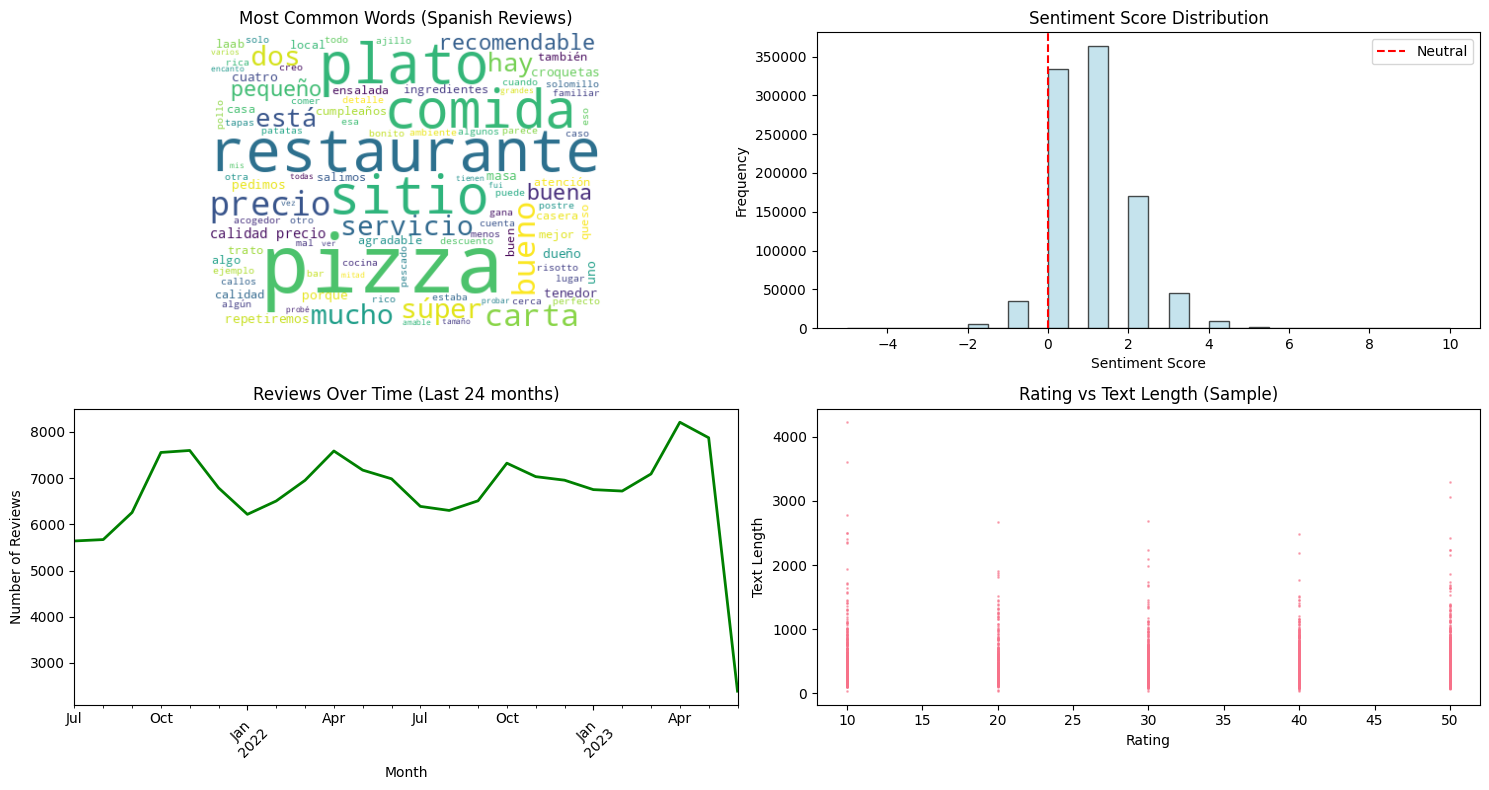

Advanced visualizations with WordCloud created successfully!


In [11]:
# 11. ADVANCED TEXT ANALYSIS
print("\n11. ADVANCED TEXT ANALYSIS")
print("-" * 50)

# Create advanced visualizations
if WORDCLOUD_AVAILABLE:
    # Most common words for word cloud
    text_for_wordcloud = ' '.join(filtered_words[:1000])  # Top 1000 words
    
    plt.figure(figsize=(15, 8))
    
    # Word cloud
    plt.subplot(2, 2, 1)
    wordcloud = WordCloud(width=400, height=300, background_color='white', max_words=100, colormap='viridis').generate(text_for_wordcloud)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Most Common Words (Spanish Reviews)')
    
    # Sentiment score distribution
    plt.subplot(2, 2, 2)
    plt.hist(spanish_reviews['sentiment_score'], bins=30, edgecolor='black', alpha=0.7, color='lightblue')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.title('Sentiment Score Distribution')
    plt.axvline(0, color='red', linestyle='--', label='Neutral')
    plt.legend()
    
    # Reviews per month/year
    plt.subplot(2, 2, 3)
    reviews['year_month'] = reviews['date_parsed'].dt.to_period('M')
    monthly_counts = reviews.groupby('year_month').size()
    monthly_counts.tail(24).plot(kind='line', color='green', linewidth=2)
    plt.xlabel('Month')
    plt.ylabel('Number of Reviews')
    plt.title('Reviews Over Time (Last 24 months)')
    plt.xticks(rotation=45)
    
    # Rating vs Text Length scatter
    plt.subplot(2, 2, 4)
    sample_reviews = reviews.sample(min(5000, len(reviews)))  # Sample for performance
    plt.scatter(sample_reviews['rating'], sample_reviews['text_length'], alpha=0.5, s=1)
    plt.xlabel('Rating')
    plt.ylabel('Text Length')
    plt.title('Rating vs Text Length (Sample)')
    
    plt.tight_layout()
    plt.show()
    
    print("Advanced visualizations with WordCloud created successfully!")
    
else:
    print("WordCloud not available, creating alternative visualizations...")
    
    # Alternative visualizations without WordCloud
    plt.figure(figsize=(15, 10))
    
    # Sentiment score distribution
    plt.subplot(2, 3, 1)
    plt.hist(spanish_reviews['sentiment_score'], bins=30, edgecolor='black', alpha=0.7, color='lightblue')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.title('Sentiment Score Distribution')
    plt.axvline(0, color='red', linestyle='--', label='Neutral')
    plt.legend()
    
    # Reviews per month/year
    plt.subplot(2, 3, 2)
    reviews['year_month'] = reviews['date_parsed'].dt.to_period('M')
    monthly_counts = reviews.groupby('year_month').size()
    monthly_counts.tail(24).plot(kind='line', color='green', linewidth=2)
    plt.xlabel('Month')
    plt.ylabel('Number of Reviews')
    plt.title('Reviews Over Time (Last 24 months)')
    plt.xticks(rotation=45)
    
    # Rating vs Text Length scatter
    plt.subplot(2, 3, 3)
    sample_reviews = reviews.sample(min(5000, len(reviews)))  # Sample for performance
    plt.scatter(sample_reviews['rating'], sample_reviews['text_length'], alpha=0.5, s=1)
    plt.xlabel('Rating')
    plt.ylabel('Text Length')
    plt.title('Rating vs Text Length (Sample)')
    
    # Top 20 words bar chart (alternative to word cloud)
    plt.subplot(2, 3, 4)
    top_words = filtered_word_freq.most_common(20)
    words, counts = zip(*top_words)
    plt.barh(range(len(words)), counts, color='skyblue', edgecolor='black')
    plt.yticks(range(len(words)), words)
    plt.xlabel('Frequency')
    plt.title('Top 20 Most Common Words')
    plt.gca().invert_yaxis()
    
    # Word length distribution
    plt.subplot(2, 3, 5)
    word_lengths = [len(word) for word in filtered_words]
    plt.hist(word_lengths, bins=15, edgecolor='black', alpha=0.7, color='coral')
    plt.xlabel('Word Length')
    plt.ylabel('Frequency')
    plt.title('Distribution of Word Lengths')
    
    # Rating distribution pie chart
    plt.subplot(2, 3, 6)
    rating_counts = reviews['rating'].value_counts()
    plt.pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Rating Distribution')
    
    plt.tight_layout()
    plt.show()
    
    print("Alternative visualizations created successfully!")